<a href="https://colab.research.google.com/github/DongChyeon/Tensorflow-Study/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras의 Fashion MNIST 데이터셋을 이용해 10 종류의 다른 옷들을 인식할 수 있도록 학습시켜보자.

<h3>라이브러리 가져오기</h3>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h3>데이터 가져오기</h3>

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


Fashion MNIST 데이터셋을 API를 통해 가져오고, load_data 함수를 호출한다.
load_data 함수를 호출하면 모델 학습에 사용되는 훈련 세트인 train_images와 train_labels, 모델 테스트에 사용되는 테스트 세트인 test_images와 test_labels 4 개의 numpy 배열이 반환된다.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

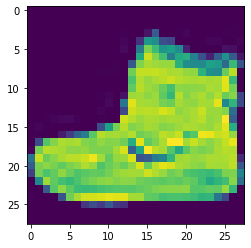

In [4]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

앞서 로드한 데이터의 training image를 출력해보면 다음과 같다. 인덱스를 달리 해서 다른 train image도 살펴볼 수 있다. 여기서 모든 값들이 0~255 범위의 값을 가지는 것을 확인할 수 있다.

<h3>데이터 전처리</h3>

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

신경망을 학습시킬 때는 모든 값을 0과 1로 만드는 것이 학습시키기 쉽다. 따라서 훈련 데이터셋과 테스트 데이터셋을 255로 나눠준다.

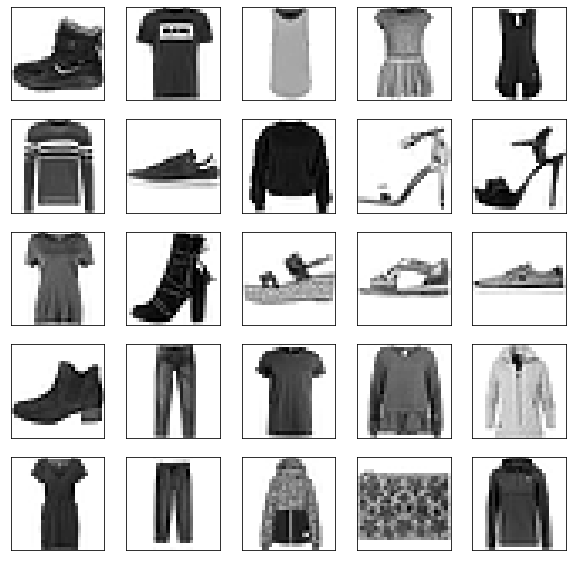

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
plt.show()

전처리를 거친 후 훈련 데이터셋의 처음 25개의 이미지를 출력해보면 위와 같다.

<h3>모델 정의하기</h3>

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential** : 신경망의 레이어 순서를 정의한다.<br>
**Flatten** : 2차원 배열의 이미지 포맷을 28 * 29 = 784 픽셀의 1차원 배열로 변환한다.<br>
**Dense** : 뉴런들을 가지고 있는 레이어를 추가. 각각의 레이어는 용도에 다른 활성화 함수를 가진다.

**Relu** : if X > 0 return X
            else return 0<br>
**Softmax** : 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진다.


<h3>모델 컴파일 후 학습시키기</h3>

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6390 - accuracy: 0.7818
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3884 - accuracy: 0.8598
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3329 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3166 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2907 - accuracy: 0.8938


손실 함수와 옵티마이저를 정의해서 모델을 컴파일 후 학습시킨다.
학습이 완료되면 정확도가 나오는데 만약 정확도가 0.8938이라면 훈련 데이터셋에서 89.38%의 정확도를 가진다는 것이다.

<h3>모델 평가하기</h3>

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 963us/step - loss: 0.3431 - accuracy: 0.8777


[0.3431026339530945, 0.8776999711990356]

만들어진 모델을 테스트 데이터셋을 통해 평가해보자. 대략 88%의 정확도가 나온다. 더 확장시켜 몇 가지 Exercise를 해보자.

<h3>Exercise 1</h3>

In [15]:
classifications = model.predict(test_images)
print(classifications[0])

[1.4004644e-05 2.1884810e-08 1.9113621e-07 2.3317477e-07 1.2712772e-07 1.7162589e-02 1.1123388e-05 4.1825164e-02 4.8216156e-05 9.4093829e-01]


다음 코드를 실행했을 때 나오는 숫자들은 무엇을 의미하는 것일까? 이는 첫번째 테스트 데이터가 각 종류의 옷일 확률이다.
따라서 이 데이터는 10번째 옷 종류인 Ankle boot일 확률이 제일 높다.

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(class_names[test_labels[0]])

Ankle boot


class_names 배열을 만듦으로써, label에 있는 정수값을 출력하는 대신 문자열로 출력할 수 있다.

<h3>Exercise 2</h3>

In [24]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(class_names[test_labels[0]])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3076
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0736
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0454
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0326
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0797
[4.3431858e-09 9.1869566e-08 7.9312301e-08 3.2386372e-06 1.5944390e-12 1.2470100e-08 2.1556593e-12 9.9999619e-01 7.5969797e-10 3.9404551e-07]
Sneaker


레이어에 있는 뉴런의 수를 늘림으로써 학습 시간은 늘어나지만 정확도를 향상시킬 수 있다.

<h3>Exercise 3</h3>

In [25]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(class_names[test_labels[0]])

Epoch 1/5


ValueError: ignored

Flatten 레이어를 제거해보면 에러가 뜨는 것을 확인할 수 있다. 여기서 입력 데이터로 28x28 픽셀의 이미지를 사용했는데 이를 위해서는 28개의 뉴런이 있는 28개의 레이어가 필요할 것이다. Flatten 레이어는 이를 1차원 자료로 변환해준다. 예를 들어, 위의 사례를 28 x 28 = 784 로 변환해준다.
직접 모든 코드를 작성하는 대신 Flatten 레이어를 시작레이어로 사용할 수 있다.

<h3>Exercise 4</h3>

In [26]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(class_names[test_labels[0]])

Epoch 1/5


InvalidArgumentError: ignored

마지막 층의 뉴런의 개수를 줄이면 어떻게 될까? 예상치 못한 값이 나와 에러가 발생할 것이다. 마지막 층의 뉴런의 개수는 종류의 개수만큼 있어야 한다. 따라서 여기서는 10종류의 옷을 구분하므로, 마지막 층의 뉴런의 개수도 10개가 되어야 한다.

<h3>Exercise 5</h3>

In [27]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(class_names[test_labels[0]])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3164
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0780
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0522
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0341
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0686
[3.9869011e-12 7.4748279e-08 8.4912593e-09 1.5717147e-08 3.5906861e-11 4.8758449e-11 1.3939718e-15 9.9999988e-01 7.6391560e-11 1.1739356e-08]
Sneaker


512개의 뉴런을 가진 레이어를 추가하면 어떻게 될까? 추가하기 전과 별로 큰 차이가 안 나는 것을 확인할 수 있다. 이는 우리가 학습시킨 데이터가 비교적 간단한 데이터이기 때문이다. 더 복잡한 데이터에서는 효과를 볼 수 있다.

<h3>Exercise 6</h3>

In [28]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(class_names[test_labels[34]])

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4371
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1243
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0809
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0580
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0427
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0249
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0212
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0166
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0136
Epoch 11/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0118
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0099
E

epoch times를 늘리면 어떻게 될까? 30회로 늘린 다음, 실행해보면 손실 값이 더 이상 줄어들지 않고 가끔씩 증가하는 것을 확인할 수 있다. 이를 '과적합'이라고 한다. 따라서 적당한 epoch times만큼 학습시키는 것이 중요하다.

<h3>Exercise 7</h3>

In [30]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#training_images=training_images/255.0
#test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(class_names[test_labels[0]])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 8.0110
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3217
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2761
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2591
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2503
[2.9125045e-27 2.2303737e-24 3.3759765e-26 1.8709535e-18 4.5092591e-25 4.7024212e-21 0.0000000e+00 1.0000000e+00 3.6753136e-25 1.1689161e-18]
Sneaker


모델을 학습시키기 전에 값들을 0과 1로 정규화시켰다. 이 과정을 없애면 어떻게 될까? 우리가 아무리 좋은 데이터를 갖고 있어도 모델에 학습시키기 위해선 스케일링을 해줘야 한다. 모델이 받아들이는 데이터의 크기가 들쑥날쑥하다면 모델이 데이터를 이상하게 해석할 우려가 있기 때문에 모든 데이터가 같은 정도의 스케일로 반영되도록 해주는 것이 정규화의 목표이다.

<h3>Exercise 8</h3>

In [38]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images / 255.0
test_images=test_images / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5841 - accuracy: 0.7940
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3673 - accuracy: 0.8663
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3234 - accuracy: 0.8825
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2990 - accuracy: 0.8901
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2772 - accuracy: 0.8976
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2668 - accuracy: 0.9010

Reached 90% accuracy so cancelling training!


Excersise 6에 대한 개선 방안으로 특정한 정확도에 도달할 시 학습을 멈추게 할 수 있다. 위 코드는 정확도가 90% 이상이면 학습을 종료시킨다.